# Bonus Track Assignment: Liquid State Machines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utility import *
from lsm import *

In [2]:
solar_df = pd.read_csv('solar_data.csv', header=None)
solar_df.head()

input_data = solar_df.to_numpy().squeeze()

In [3]:
train, test = input_data[:2398], input_data[2398:] # train-test split

train_len = int(len(train) * 0.8)
train_data, val_data = train[:train_len], train[train_len:] # train-validation split

In [4]:
train_X, val_X, test_X = train_data[:-1], val_data[:-1], test[:-1] # input values for train, validation and test sets
train_Y, val_Y, test_Y = train_data[1:], val_data[1:], test[1:] # target values for train, validation and test sets

In [5]:
train_Y.shape

(1917,)

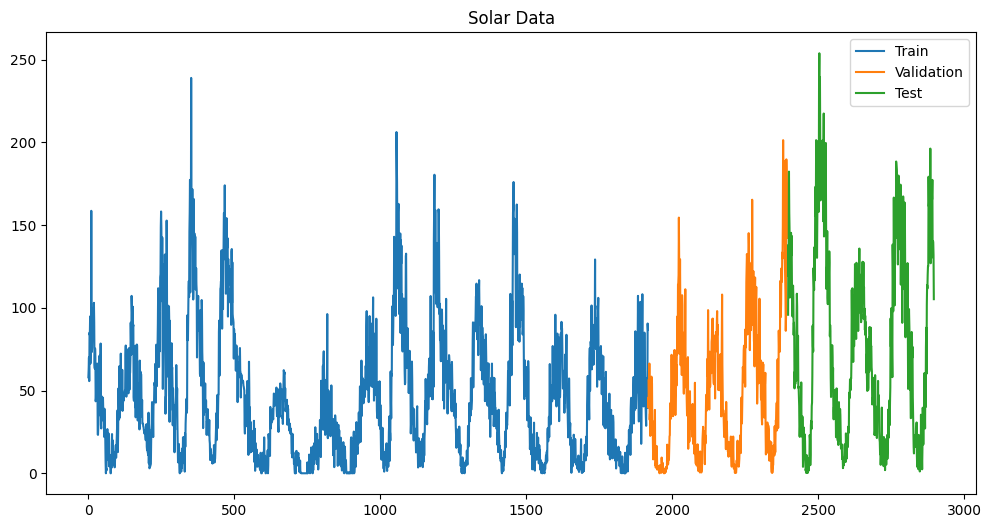

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(range(0, train_X.shape[0]), train_X, label='Train')
plt.plot(range(train_X.shape[0], train_X.shape[0] + val_X.shape[0]), val_X, label='Validation')
plt.plot(range(train_X.shape[0] + val_X.shape[0], train_X.shape[0] + val_X.shape[0] + test_X.shape[0]), test_X, label='Test')
plt.title('Solar Data')
plt.legend()

### Model Selection Hyperparameters Search

In [7]:
hyperparameters_to_explore = {
    "Ni" : [200, 400, 600],
    "Ne" : [400, 600, 800],
    "win_e" : [3, 5, 6],
    "win_i" : [1, 2, 3],
    "w_e": [0.3 ,0.5, 0.6],
    "w_i": [0.7, 1, 1.1]
}

config, val_mae, train_mae = grid_search(hyperparameters_to_explore, train_X, train_Y, val_X, val_Y)

/home/jacopo/CNS_Assignments/LAB1/BONUS_LAB1/lsm.py:37: RuntimeWarning: overflow encountered in square
  v = v + 0.5*(0.04*v**2 + 5*v + 140 - u + I)  # for numerical stability
/home/jacopo/CNS_Assignments/LAB1/BONUS_LAB1/lsm.py:37: RuntimeWarning: invalid value encountered in add
  v = v + 0.5*(0.04*v**2 + 5*v + 140 - u + I)  # for numerical stability


In [8]:
config, val_mae, train_mae 

({'Ni': 200, 'Ne': 400, 'win_e': 6, 'win_i': 2, 'w_e': 0.5, 'w_i': 1.1},
 29.241369840864834,
 16.045355451789387)

In [9]:
retrain_X, retrain_Y = train[:-1], train[1:] # input and target values for the final retraining (training + validation set)
lsm = LSM(Ne=config['Ne'], Ni=config['Ni'], win_e=config['win_e'], win_i=config['win_i'], w_e=config['w_e'], w_i=config['w_i'])
lsm.fit(retrain_X, retrain_Y) # final retraining

y_test_pred = lsm(test_X)
mae_test = MAE(test_Y, y_test_pred) # MAE on the test set

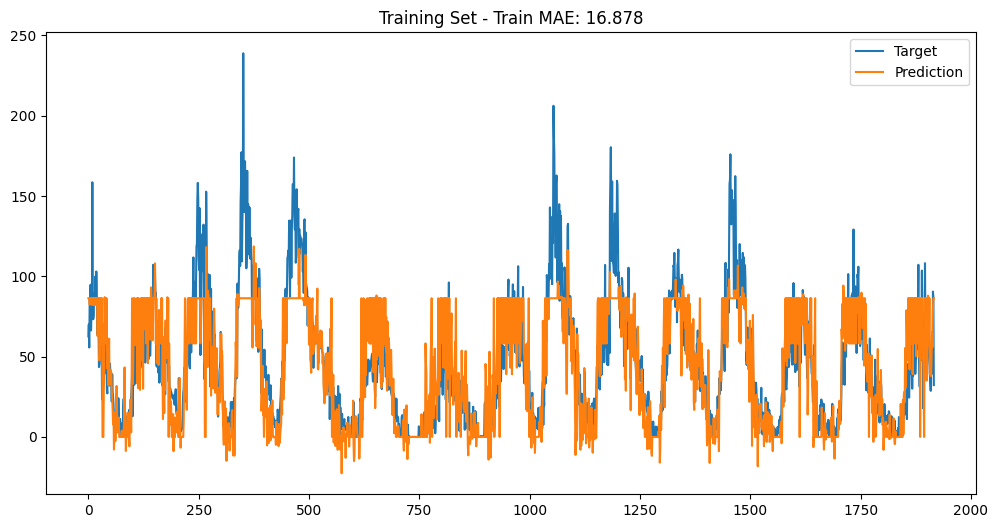

In [10]:
plt.figure(figsize=(12, 6))
y_train_pred = lsm(train_X)
plt.plot(train_Y, label='Target')
plt.plot(y_train_pred, label='Prediction')
plt.title(f'Training Set - Train MAE: {round(MAE(train_Y, y_train_pred), 3)}') # train error computed on the training set after retraining
plt.legend()

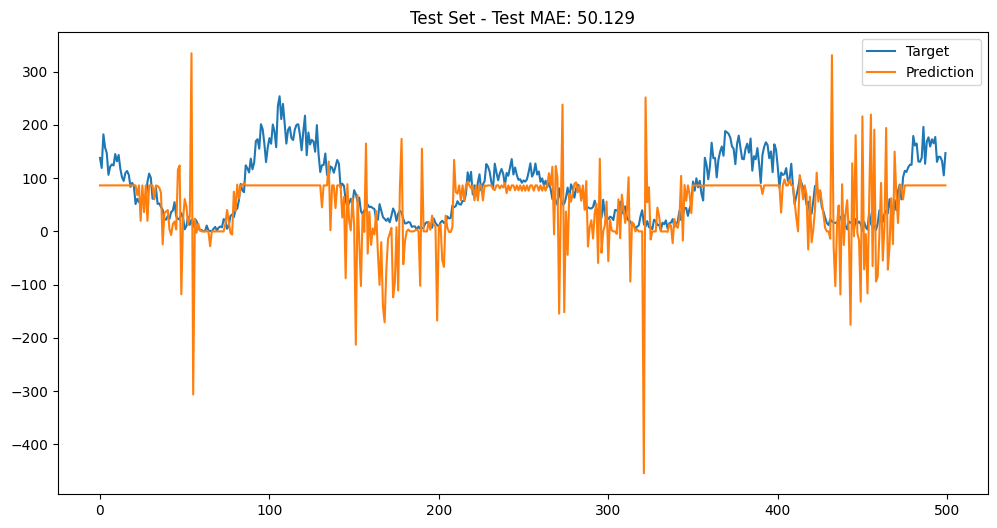

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(test_Y, label='Target')
plt.plot(y_test_pred, label='Prediction')
plt.title(f'Test Set - Test MAE: {round(mae_test, 3)}')
plt.legend()